<a href="https://colab.research.google.com/github/Uzma-Jawed/ML-using-Python/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning using Python**

# 🍜 Logistic Regression
`on Cuisine Dataset`

In this notebook, we apply **Logistic Regression** to classify cuisines based on ingredients.  
We will explore the dataset, preprocess features, handle class imbalance, train a model, and evaluate performance.  

## 1. Import Libraries and Load Data
We start by importing required libraries and loading the `cuisines.csv` dataset.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv('/content/cuisines.csv')

In [129]:
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


## 2. Explore Dataset
Check the distribution of cuisines in the dataset.


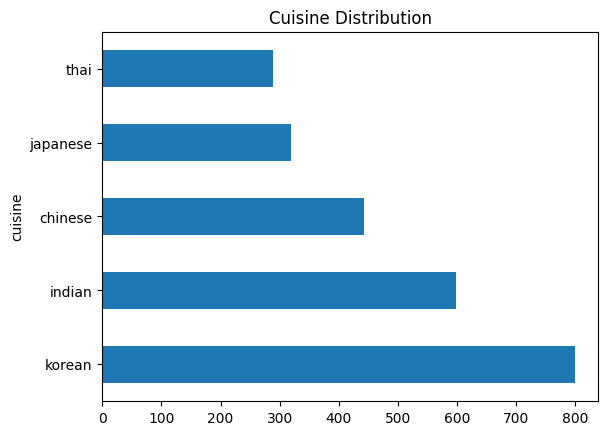

In [131]:
df.cuisine.value_counts().plot.barh()
plt.title("Cuisine Distribution")
plt.show()

## 3. Filter Datasets by Cuisine
For each cuisine, extract its subset of recipes.

In [132]:
thai_df = df[(df.cuisine == 'thai')]
japanese_df = df[(df.cuisine == 'japanese')]
chinese_df = df[(df.cuisine == 'chinese')]
indian_df = df[(df.cuisine == 'indian')]
korean_df = df[(df.cuisine == 'korean')]

In [133]:
print(f'thai_df : {thai_df.shape}')
print(f'japanese_df : {japanese_df.shape}')
print(f'chinese_df : {chinese_df.shape}')
print(f'indian_df : {indian_df.shape}')
print(f'korean_df : {korean_df.shape}')

thai_df : (289, 385)
japanese_df : (320, 385)
chinese_df : (442, 385)
indian_df : (598, 385)
korean_df : (799, 385)


## 4. Ingredient Frequency Analysis
Define a helper function to find the most frequent ingredients per cuisine.

In [134]:
def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine', 'Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False)
    return ingredient_df

### Top Ingredients by Cuisine

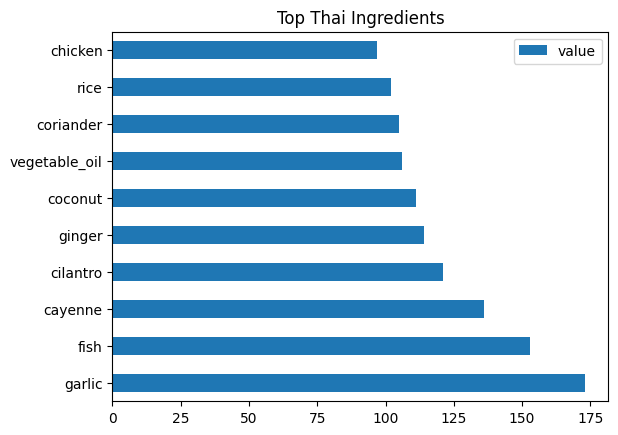

In [135]:
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh(title="Top Thai Ingredients"); plt.show()

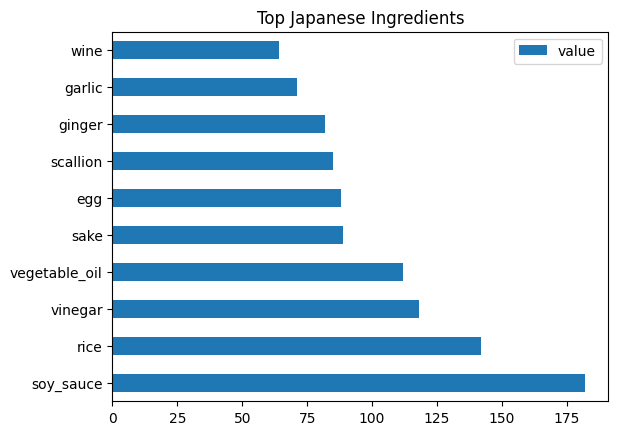

In [136]:
japanese_ingredient_df = create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.barh(title="Top Japanese Ingredients"); plt.show()

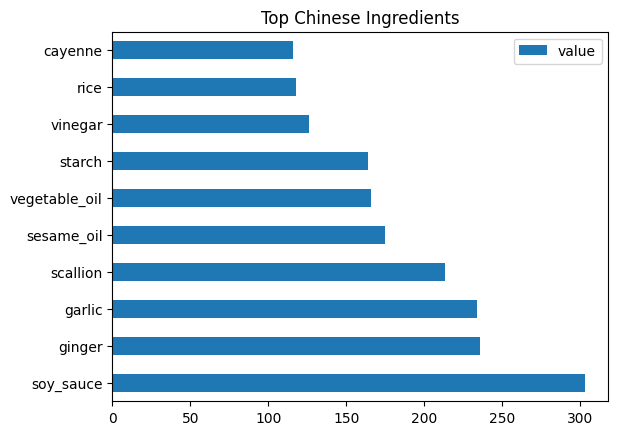

In [137]:
chinese_ingredient_df = create_ingredient_df(chinese_df)
chinese_ingredient_df.head(10).plot.barh(title="Top Chinese Ingredients"); plt.show()

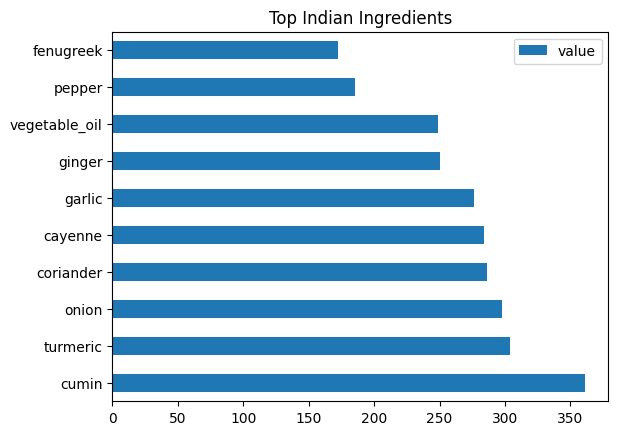

In [138]:
indian_ingredient_df = create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.barh(title="Top Indian Ingredients"); plt.show()

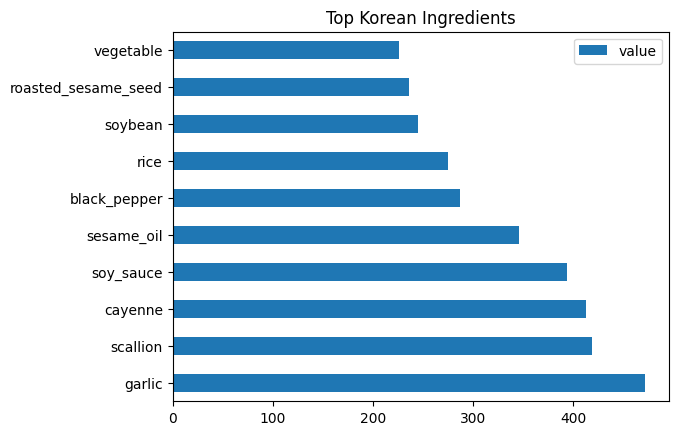

In [139]:
korean_ingredient_df = create_ingredient_df(korean_df)
korean_ingredient_df.head(10).plot.barh(title="Top Korean Ingredients"); plt.show()

## 5. Feature Engineering
- Drop non-feature columns (`cuisine`, `Unnamed: 0`)  
- Drop highly dominant ingredients (`rice`, `garlic`, `ginger`)  

In [140]:
feature_df = df.drop(['cuisine', 'Unnamed: 0', 'rice', 'garlic', 'ginger'], axis=1)
labels_df = df.cuisine
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## 6. Handle Class Imbalance with SMOTE
Since cuisines are imbalanced, we use **SMOTE** to oversample minority classes.

In [141]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=42)
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

print(f'new label count :{transformed_label_df.value_counts()}')
print(f'old label count :{labels_df.value_counts()}')

new label count :cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64
old label count :cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


## 7. Train Logistic Regression Model
Split dataset into training/testing sets and fit the model.

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    transformed_feature_df, transformed_label_df, test_size=0.3, random_state=42
)

# Initialize model
lr = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)

### Cross-Validation Performance
Check stability of the model across folds.

In [143]:
cv_scores = cross_val_score(lr, transformed_feature_df, transformed_label_df, cv=5)
print(f'Cross-validation accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}')

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

Cross-validation accuracy: 0.784 ± 0.031


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


### Train and Evaluate Model

In [144]:
# Train model
model = lr.fit(X_train, np.ravel(y_train))

# Accuracy on test set
accuracy = model.score(X_test, y_test)
print('Accuracy is {}'.format(accuracy))

Accuracy is 0.8015012510425354


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
print(f'ingredients: {X_test.iloc[50][X_test.iloc[50]!=0].keys()}')
print(f'cuisine: {y_test.iloc[50]}')

## 8. Test Predictions on One Sample
Check which cuisine the model predicts for a single recipe.

In [145]:
print(f'ingredients: {X_test.iloc[50][X_test.iloc[50]!=0].keys()}')
print(f'cuisine: {y_test.iloc[50]}')

ingredients: Index(['coriander', 'cumin', 'fenugreek', 'pepper', 'soy_sauce', 'turmeric'], dtype='object')
cuisine: thai


In [146]:
test = X_test.iloc[[50]]
proba = model.predict_proba(test)
classes = model.classes_
resultdf = pd.DataFrame(data=proba, columns=classes)

toppred = resultdf.T.sort_values(by=[0], ascending=False)
toppred.head()

,0
thai,0.451215
japanese,0.280530
indian,0.176587
chinese,0.090830
korean,0.000838


## 9. Classification Report
Evaluate model performance with precision, recall, and F1-score.

In [147]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     chinese       0.74      0.69      0.72       236
      indian       0.91      0.90      0.91       245
    japanese       0.72      0.78      0.75       231
      korean       0.81      0.75      0.78       242
        thai       0.83      0.87      0.85       245

    accuracy                           0.80      1199
   macro avg       0.80      0.80      0.80      1199
weighted avg       0.80      0.80      0.80      1199

